# Banking Predictions
### - Predicts the account balance of a customer in a bank

- [x] Data Cleaning
- [x] Data Exploration
- [x] Data Visualization
- [x] Feature Engineering
- [x] Model Building
- [x] Model Evaluation

## Read the checkings account data from the csv file

In [73]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.insert(0, "utils.py")

import utils

### Read in the data

In [74]:
data_folder = "Chase_Banking_Transactions"
data_folder = "Bank_Data"
df_checkings = utils.combine_dfs(data_folder, "checkings.csv")
df_checkings = df_checkings.rename(columns={"Posting Date": "Date"})
df_checkings = df_checkings.set_index("Date")
df_checkings.index = pd.to_datetime(df_checkings.index)

### Inspect the data

In [75]:
df_checkings.head()

,Details,Amount,Type,Balance,Check or Slip #
Date,,,,,
2010-01-01,DEBIT,-79.0,DEBIT_CARD,813.46,NaN
2010-01-02,DEBIT,-799.0,ACCT_XFER,13.46,NaN
2010-01-03,DEBIT,-799.0,ACCT_XFER,13.46,NaN
2010-01-04,DEBIT,-799.0,ACCT_XFER,13.46,NaN
2010-01-05,DEBIT,-799.0,ACCT_XFER,13.46,NaN


### Plot the data

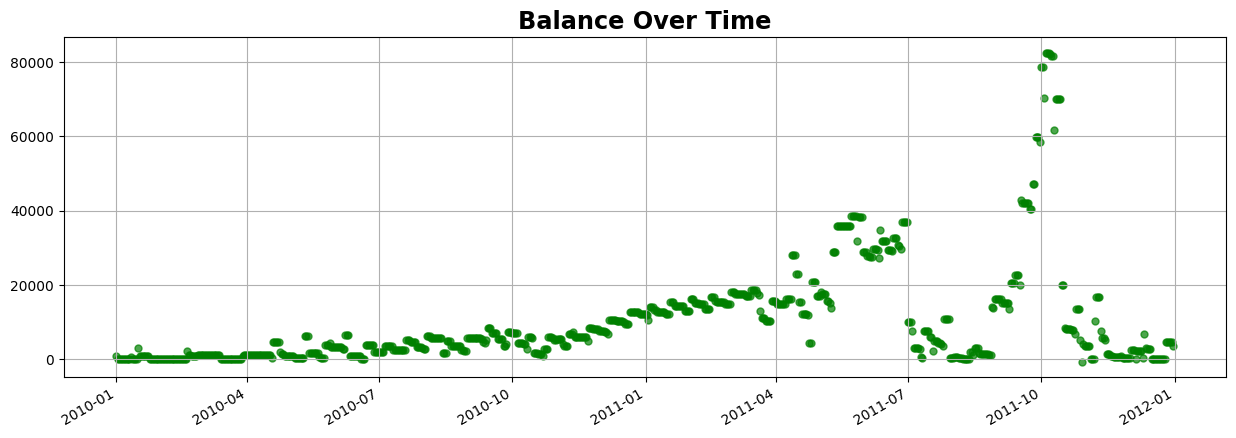

In [76]:
utilss.graph_checkings(df_checkings)

# Data Cleaning

### Drop all unnecessary columns

In [77]:
balance_df = df_checkings.drop(columns=["Amount", "Details", "Type", "Check or Slip #"])
balance_df.head()

,Balance
Date,
2010-01-01,813.46
2010-01-02,13.46
2010-01-03,13.46
2010-01-04,13.46
2010-01-05,13.46


### Limit the data to provide more accurate predictions
- This is not always necessary, but I'm choosing this because the last year or so of data is erratic and not representative of the overall trend.

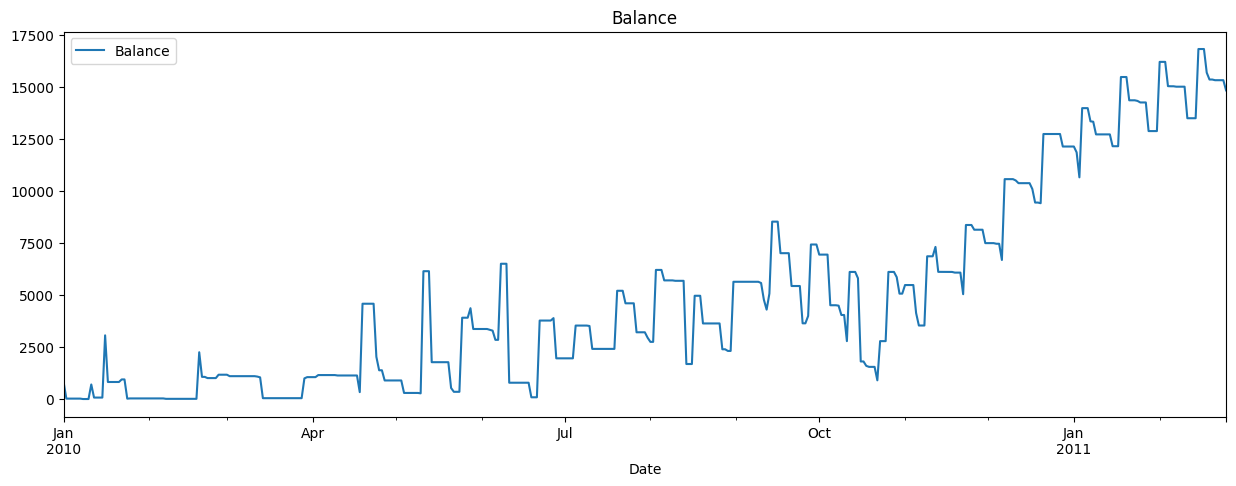

In [78]:
end_date = balance_df.index[420]
balance_df = balance_df.loc[:end_date].copy()
balance_df.plot(figsize=(15, 5), title="Balance")
plt.show()

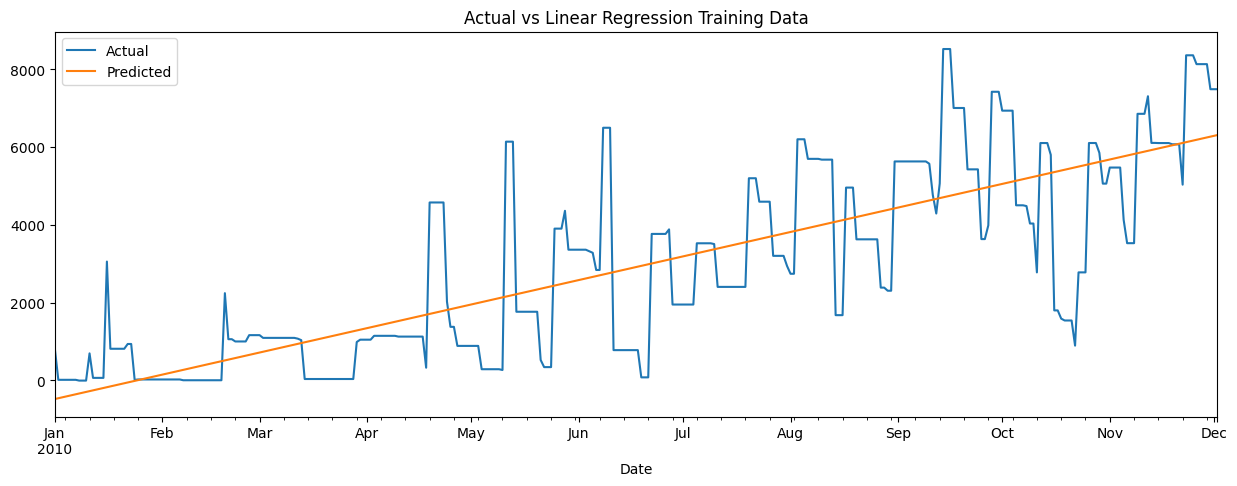

Mean Squared Error (MSE): 2190844.0841175187
Root Mean Squared Error (RMSE): 1480.1500208146197
Mean Absolute Error (MAE): 1133.5585328475759
R-squared (R2) Score: 0.6381289699514636


In [79]:
# TODO: apply polynomial regression to the data before you take the avg

train_data, test_data = utils.train_test_split_01(balance_df)
utils.plot_train_data_with_regression(
    train_data, "Date", "Balance", regression_type="poly", eval_model=True
)

## Plot the train test split

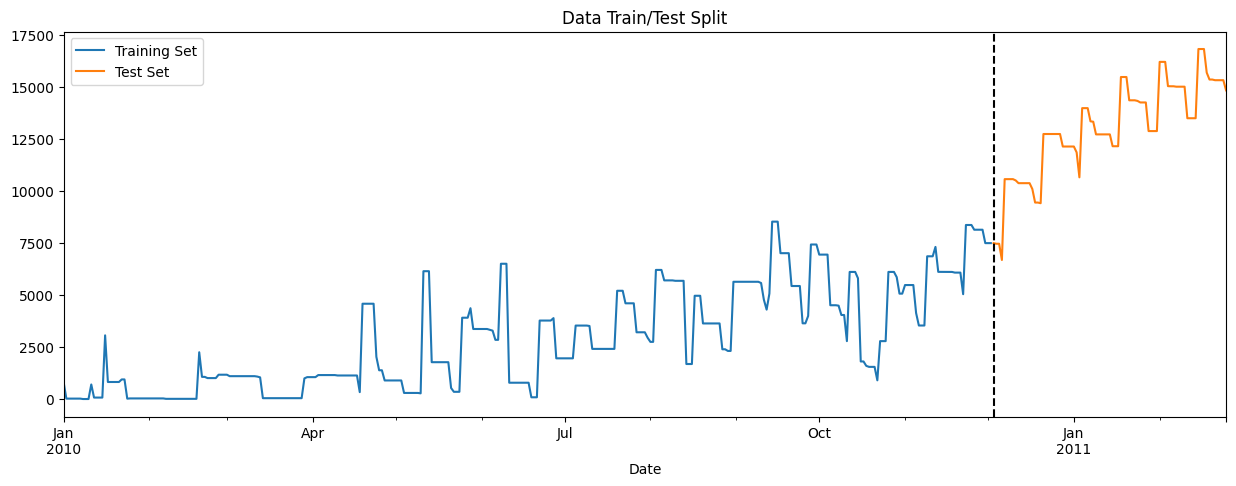

In [80]:
train_data, test_data = utils.train_test_split_01(balance_df)
X_train, y_train, X_test, y_test = utils.train_test_split_02(
    train_data, test_data, "Date", "Balance"
)
utils.plot_train_test_split(train_data, test_data)

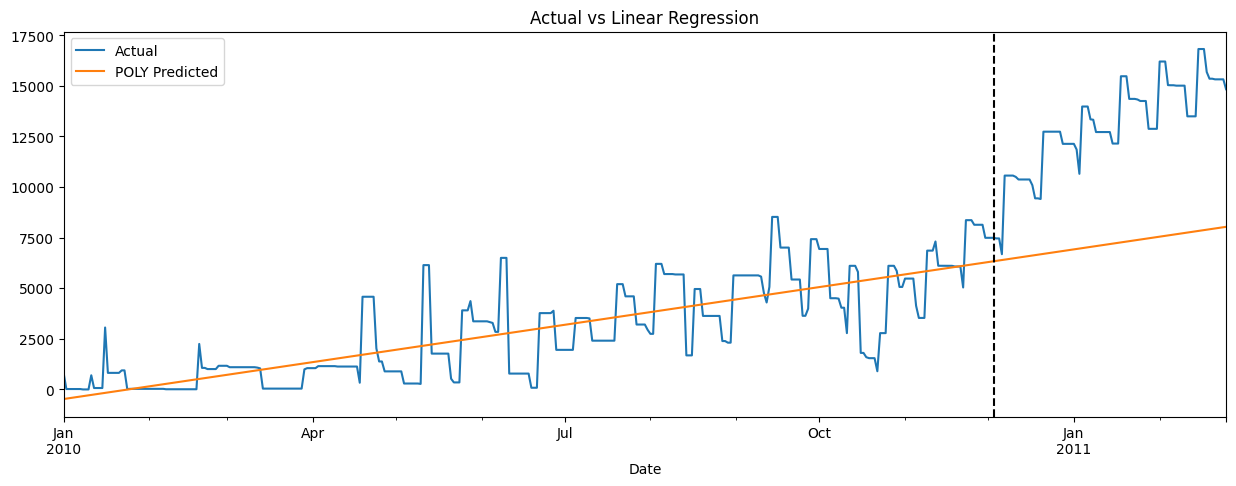

Mean Squared Error (MSE): 37266358.63238793
Root Mean Squared Error (RMSE): 6104.61781214745
Mean Absolute Error (MAE): 5813.43776362344
R-squared (R2) Score: -6.240722789901905


In [81]:
# plot the full prediction
utils.plot_all_data_with_entire_regression_line(
    balance_df, "Date", "Balance", regression_type="poly", eval_model=True
)

# Model is terrible, try to take the average and see if results are better

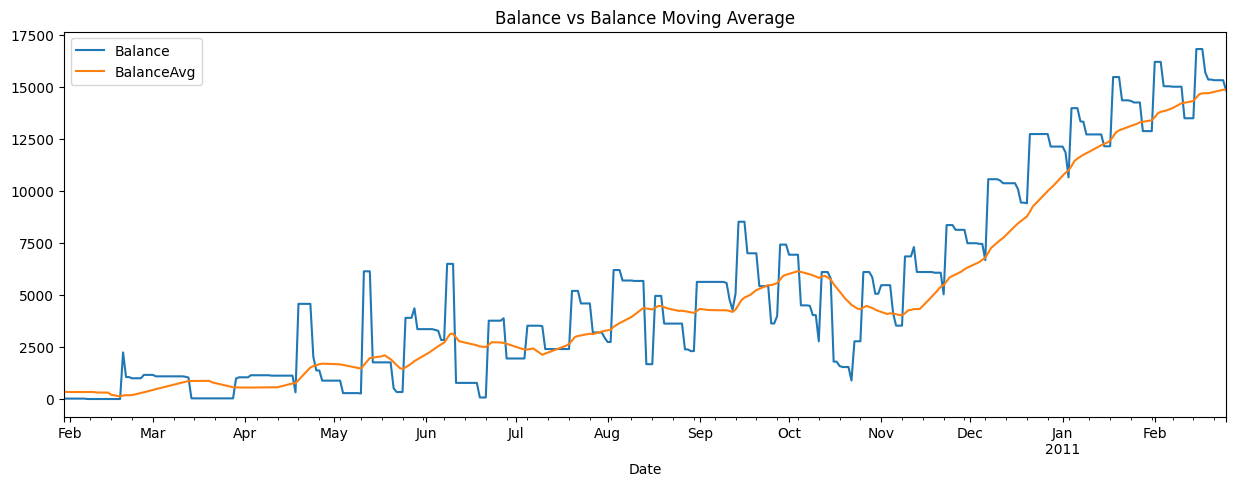

In [82]:
# Take the rolling mean of balance
balance_df["BalanceAvg"] = balance_df["Balance"].rolling(window=30).mean()

# get the first date where BalanceAvg is not null
bal_avg_df = balance_df[balance_df["BalanceAvg"].notnull()]

# plot the avg columns
fig, ax = plt.subplots(figsize=(15, 5))
bal_avg_df.plot(ax=ax, label="Balance", title="Balance vs Balance Moving Average")
plt.show()

## Get the training and testing set of data

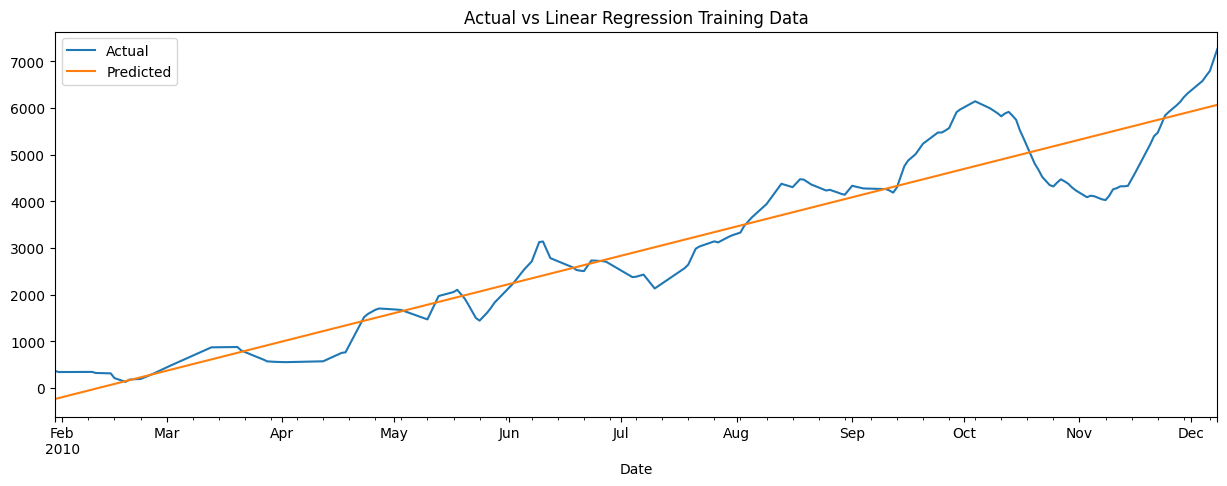

Mean Squared Error (MSE): 324225.5453339393
Root Mean Squared Error (RMSE): 569.4080657436627
Mean Absolute Error (MAE): 434.9566031353036
R-squared (R2) Score: 0.9115057354104777


In [83]:
train_data, test_data = utils.train_test_split_01(bal_avg_df)
utils.plot_train_data_with_regression(
    train_data, "Date", "BalanceAvg", regression_type="poly", eval_model=True
)

# Apply Test Train Split for the polynomial regression data

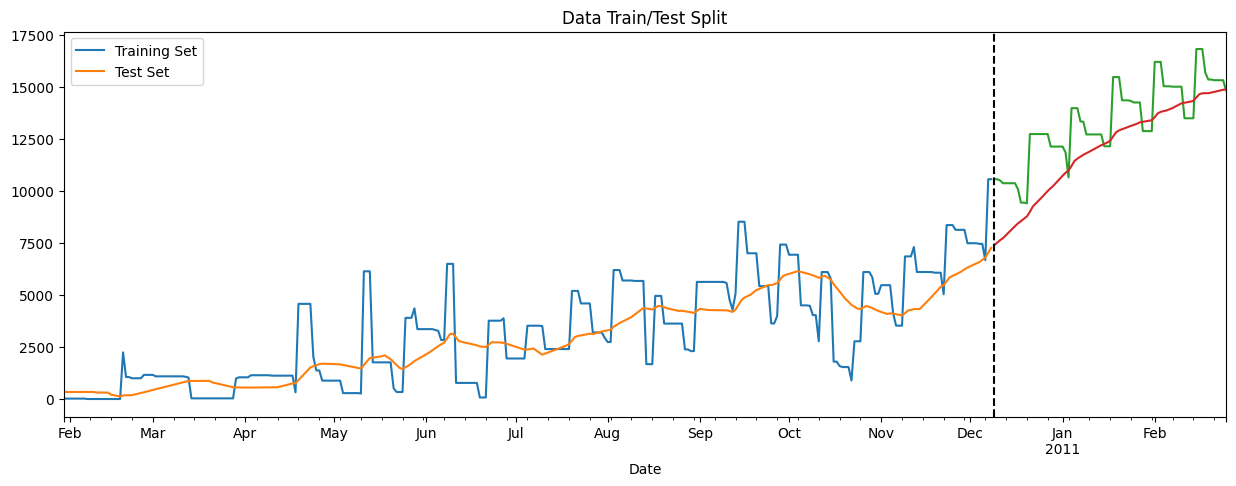

In [84]:
utils.plot_train_test_split(train_data, test_data)

## Graph the entire regression line not just the test data

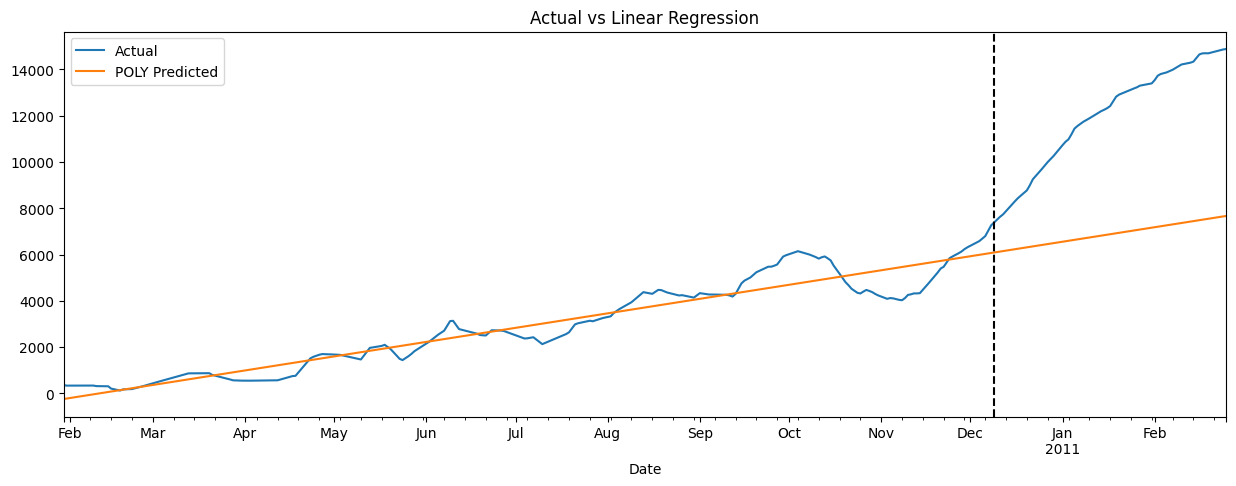

Mean Squared Error (MSE): 29292037.16930449
Root Mean Squared Error (RMSE): 5412.211855545243
Mean Absolute Error (MAE): 5099.633037552185
R-squared (R2) Score: -4.727067175495429


In [85]:
utils.plot_all_data_with_entire_regression_line(
    bal_avg_df, "Date", "BalanceAvg", regression_type="poly", eval_model=True
)

## As you can see, polynomial regression is not a good predictor for this data